# ROC Curve, AUC

<img src="files/roc_curve.jpeg">

In [2]:
# fpr = fp/(fp+tn)
# tpr = tp/(tp+fn)

In [13]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
import numpy as np

In [14]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

In [15]:
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [16]:
# calculate score
lr_auc = roc_auc_score(testy, lr_probs)
# summarize score
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curve
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

Logistic: ROC AUC=0.903


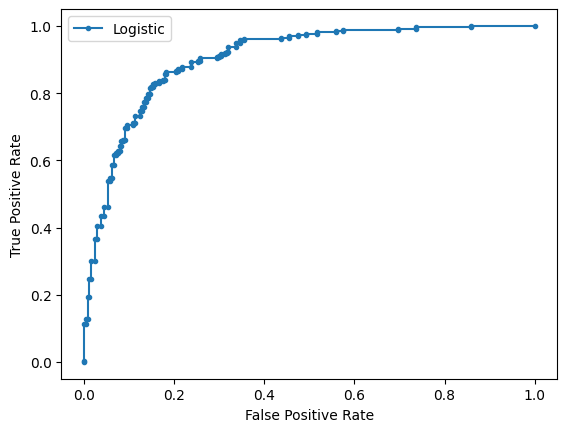

In [17]:
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Homework

implement roc_auc_score and roc_curve functions on your own

In [18]:

def roc_curve(testy, lr_probs):
    threshold = np.linspace(0, 1, num=200)
    fpr = []
    tpr = []
    for i in threshold:
        y_pred = [1 if val>=i else 0 for val in lr_probs]
        tn, fp, fn, tp = confusion_matrix(testy,y_pred).ravel()
        fpr.append(fp/(fp+tn))
        tpr.append(tp/(tp+fn))
        
    return fpr, tpr

def roc_auc_score(testy, lr_probs):
    x, y = roc_curve(testy, lr_probs)
    auc = 0
    for i in range(1, len(x)):
        h = x[i] - x[i-1]
        auc += -h * (y[i-1] + y[i]) / 2
    return auc

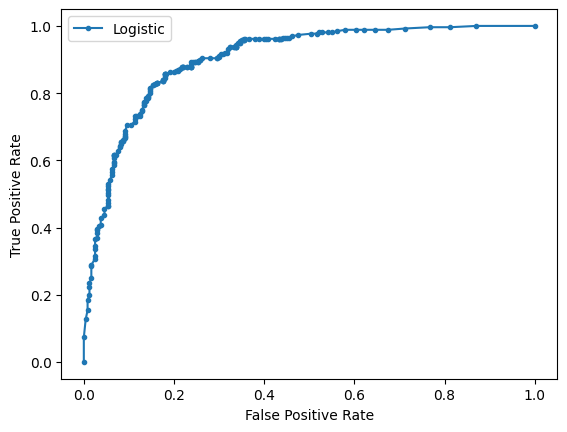

In [19]:
lr_fpr,lr_tpr =  roc_curve(testy, lr_probs)
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [20]:
roc_auc_score(testy, lr_probs)

0.9028525641025644